# End-to-end Solution

## Import Data

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random as rnd

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

np.random.seed(0)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/VIX Data Scientist/loan_data_2007_2014.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [4]:
df = df.dropna(axis=1, how="all")
print("Remaining columns info:")
print(df.info())

Remaining columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               46628

In [5]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [6]:
df = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [7]:
df.shape

(227214, 57)

In [8]:
df['loan_status'].value_counts(dropna=False)

Fully Paid     184739
Charged Off     42475
Name: loan_status, dtype: int64

In [9]:
df['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.813062
Charged Off    0.186938
Name: loan_status, dtype: float64

In [10]:
# plt.figure(figsize=(16, 12))
# sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [11]:
# dropcols = []
# df.drop(dropcols, axis=1, inplace=True)
# df.info()

In [12]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim

Missing

In [13]:
missing_fractions = df.isnull().mean().sort_values(ascending=False)

In [14]:
missing_fractions.head(10)

next_pymnt_d                   1.000000
mths_since_last_record         0.882732
mths_since_last_major_derog    0.823875
desc                           0.611314
mths_since_last_delinq         0.563605
tot_cur_bal                    0.280388
tot_coll_amt                   0.280388
total_rev_hi_lim               0.280388
emp_title                      0.055908
emp_length                     0.038171
dtype: float64

Text(0, 0.5, 'Feature count')

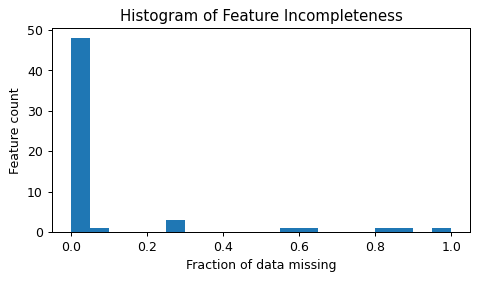

In [15]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')


In [16]:
# Drop column with condition
drop_list = sorted(list(missing_fractions[missing_fractions > 0.4].index))
print(drop_list)

['desc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'next_pymnt_d']


In [17]:
len(drop_list)

5

In [18]:
df.drop(labels=drop_list, axis=1, inplace=True)

In [19]:
print(sorted(df.columns))
print(df.shape)

['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'member_id', 'open_acc', 'out_prncp', 'out_prncp_inv', 'policy_code', 'pub_rec', 'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'url', 'verification_status', 'zip_code']
(227214, 52)


In [20]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']
len(keep_list)

31

In [21]:
drop_list = [col for col in df.columns if col not in keep_list]
print(drop_list)

['member_id', 'funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [22]:
len(drop_list)

25

In [23]:
df.drop(labels=drop_list, axis=1, inplace=True)

In [24]:
df.shape

(227214, 27)

## Exploratory Data Analysis

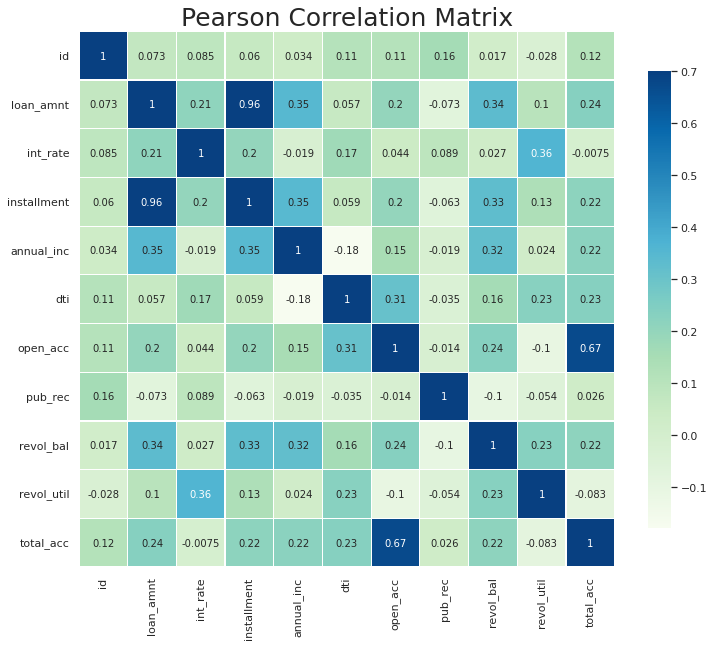

In [25]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(12,12))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":10}, cbar_kws={"shrink": .7})

Text(0.5, 1.0, 'Loan Amount Distribution')

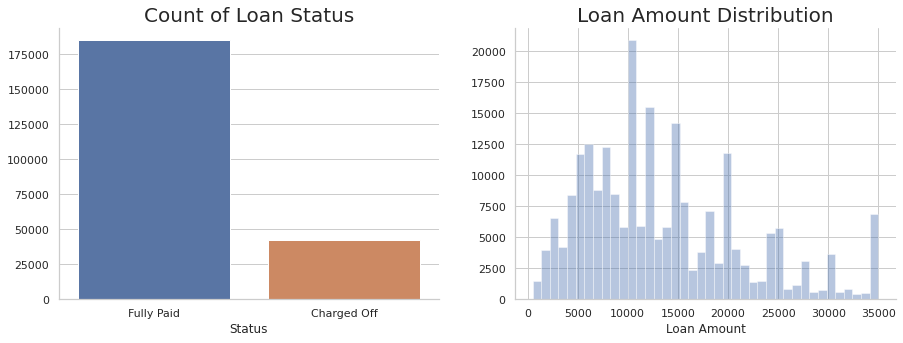

In [26]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='loan_status', data=df, ax=axes[0])
sns.distplot(df['loan_amnt'], kde=False, bins=40, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Status', ylabel='')
axes[0].set_title('Count of Loan Status', size=20)
axes[1].set(xlabel='Loan Amount', ylabel='')
axes[1].set_title('Loan Amount Distribution', size=20)

Text(0.5, 1.0, 'Boxplot between Loan Amount and Loan Status')

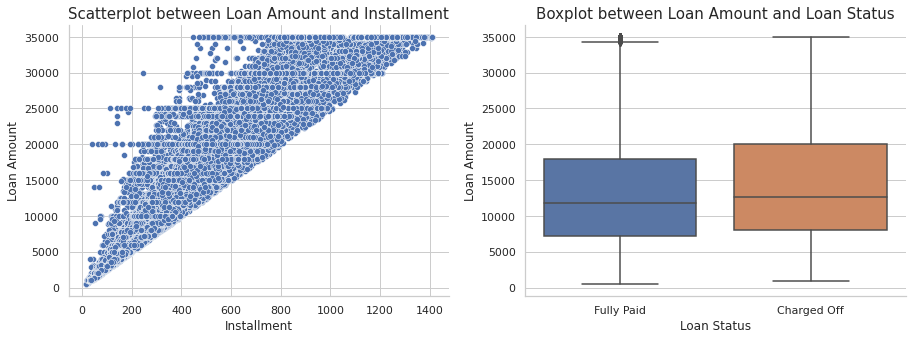

In [27]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(x='installment', y='loan_amnt', data=df, ax=axes[0])
sns.boxplot(x='loan_status', y='loan_amnt', data=df, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Installment', ylabel='Loan Amount')
axes[0].set_title('Scatterplot between Loan Amount and Installment', size=15)
axes[1].set(xlabel='Loan Status', ylabel='Loan Amount')
axes[1].set_title('Boxplot between Loan Amount and Loan Status', size=15)

In [28]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,42475.0,14518.758682,8373.184813,900.0,8000.0,12600.0,20000.0,35000.0
Fully Paid,184739.0,13214.394226,7949.030252,500.0,7125.0,11800.0,18000.0,35000.0


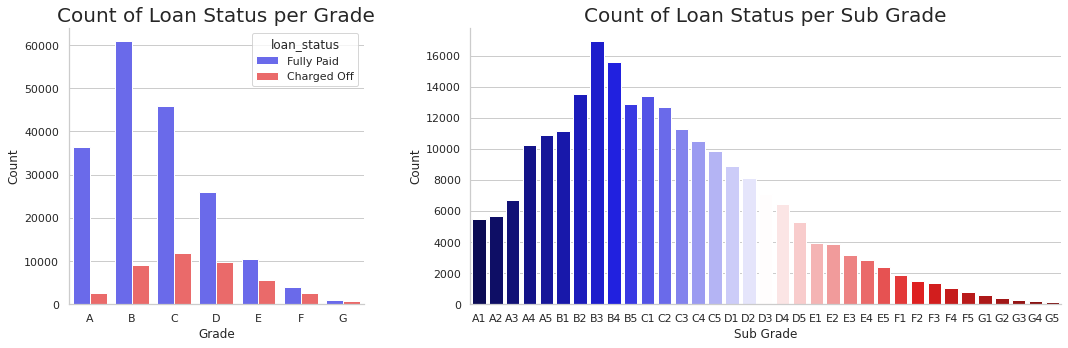

In [29]:
f, axes = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={'width_ratios': [1, 2]})
sns.countplot(x='grade', hue='loan_status', data=df, order=sorted(df['grade'].unique()), palette='seismic', ax=axes[0])
sns.countplot(x='sub_grade', data=df, palette='seismic', order=sorted(df['sub_grade'].unique()), ax=axes[1])
sns.despine()
axes[0].set(xlabel='Grade', ylabel='Count')
axes[0].set_title('Count of Loan Status per Grade', size=20)
axes[1].set(xlabel='Sub Grade', ylabel='Count')
axes[1].set_title('Count of Loan Status per Sub Grade', size=20)
plt.tight_layout()

In [30]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,0,Charged Off
2,1,Fully Paid
3,1,Fully Paid
5,1,Fully Paid


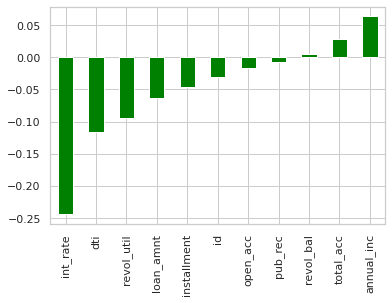

In [31]:
df.corr()['loan_repaid'].sort_values(ascending=True).drop('loan_repaid').plot.bar(color='green')

## Pre-processing

In [32]:
print(len(df))

227214


In [33]:
df.isnull().sum()

id                         0
loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title              12703
emp_length              8673
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     13
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               186
total_acc                  0
initial_list_status        0
application_type           0
loan_repaid                0
dtype: int64

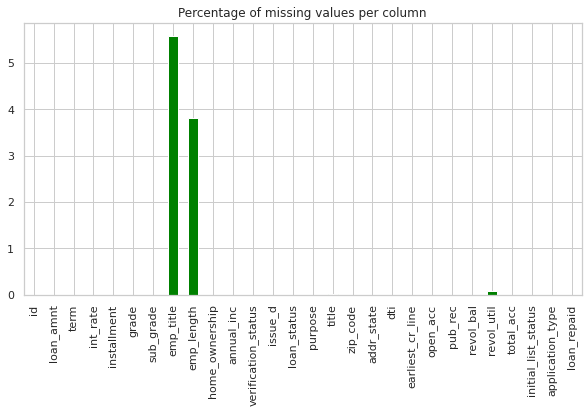

In [34]:
plt.figure(figsize=(10,5))
((df.isnull().sum())/len(df)*100).plot.bar(title='Percentage of missing values per column', color='green')

In [35]:
print(df['emp_title'].nunique())
df['emp_title'].value_counts()

124991


Teacher                          1527
Manager                          1503
Registered Nurse                  668
RN                                667
Supervisor                        658
                                 ... 
Cambridge Associates                1
Vericom Global Solutions            1
SA Food llc (Arbys San Diego)       1
Worsek & Vihon LLP                  1
Server Engineer Lead                1
Name: emp_title, Length: 124991, dtype: int64

In [36]:
df = df.drop('emp_title',axis=1)

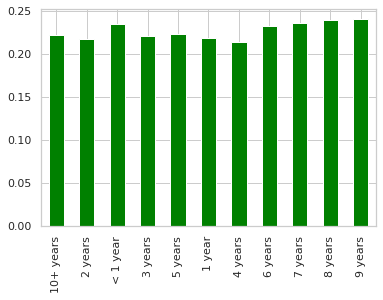

In [37]:
per_charge_off = df[df['loan_repaid'] == 0]['emp_length'].value_counts() / df[df['loan_repaid'] == 1]['emp_length'].value_counts()
per_charge_off.plot.bar(color='green')

In [38]:
df = df.drop('emp_length', axis=1)

In [39]:
df[['title', 'purpose']].head(10)

,title,purpose
0,Computer,credit_card
1,bike,car
2,real estate business,small_business
3,personel,other
5,My wedding loan I promise to pay back,wedding
7,Car Downpayment,car
8,Expand Business & Buy Debt Portfolio,small_business
9,Building my credit history.,other
10,High intrest Consolidation,debt_consolidation
11,Consolidation,debt_consolidation


In [40]:
df = df.drop('title', axis=1)

In [41]:
df = df.dropna()

In [42]:
df.isnull().sum()

id                     0
loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
initial_list_status    0
application_type       0
loan_repaid            0
dtype: int64

## Variables

In [43]:
print(df['term'].value_counts())
print('\n')
print('\n')

df['term'] = df['term'].apply(lambda term: int(term[:3]))

print(df['term'].value_counts())

 36 months    178404
 60 months     48624
Name: term, dtype: int64




36    178404
60     48624
Name: term, dtype: int64


In [44]:
df = df.drop('grade', axis=1)

In [45]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [46]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)

df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

df = pd.concat([df,dummies],axis=1)

In [47]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [48]:
df = df.drop('issue_d', axis=1)

In [49]:
df = df.drop('earliest_cr_line', axis=1)

df.select_dtypes(['object']).columns

Index(['loan_status', 'zip_code', 'addr_state'], dtype='object')

In [50]:
df = df.drop(['loan_status', 'zip_code', 'addr_state'],axis=1)

## Train test split

In [51]:
# Features
X = df.drop('loan_repaid',axis=1).values

# Label
y = df['loan_repaid'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(181622, 65)
(45406, 65)
(181622,)
(45406,)


In [53]:
scaler = MinMaxScaler()

# Fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Scaled between 1 and 0
print('Max: ', X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


### Modelling

In [54]:
model = Sequential()

# input layer
model.add(Dense(65,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer="adam", loss='binary_crossentropy')

In [55]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [56]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          verbose=2,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/400
710/710 - 3s - loss: 0.4705 - val_loss: 0.4451 - 3s/epoch - 4ms/step
Epoch 2/400
710/710 - 2s - loss: 0.4549 - val_loss: 0.4425 - 2s/epoch - 3ms/step
Epoch 3/400
710/710 - 2s - loss: 0.4513 - val_loss: 0.4410 - 2s/epoch - 3ms/step
Epoch 4/400
710/710 - 2s - loss: 0.4494 - val_loss: 0.4406 - 2s/epoch - 3ms/step
Epoch 5/400
710/710 - 2s - loss: 0.4476 - val_loss: 0.4402 - 2s/epoch - 3ms/step
Epoch 6/400
710/710 - 2s - loss: 0.4470 - val_loss: 0.4403 - 2s/epoch - 3ms/step
Epoch 7/400
710/710 - 2s - loss: 0.4461 - val_loss: 0.4400 - 2s/epoch - 3ms/step
Epoch 8/400
710/710 - 2s - loss: 0.4453 - val_loss: 0.4402 - 2s/epoch - 3ms/step
Epoch 9/400
710/710 - 2s - loss: 0.4444 - val_loss: 0.4398 - 2s/epoch - 3ms/step
Epoch 10/400
710/710 - 2s - loss: 0.4440 - val_loss: 0.4394 - 2s/epoch - 3ms/step
Epoch 11/400
710/710 - 2s - loss: 0.4436 - val_loss: 0.4392 - 2s/epoch - 3ms/step
Epoch 12/400
710/710 - 2s - loss: 0.4432 - val_loss: 0.4390 - 2s/epoch - 3ms/step
Epoch 13/400
710/710 - 2s

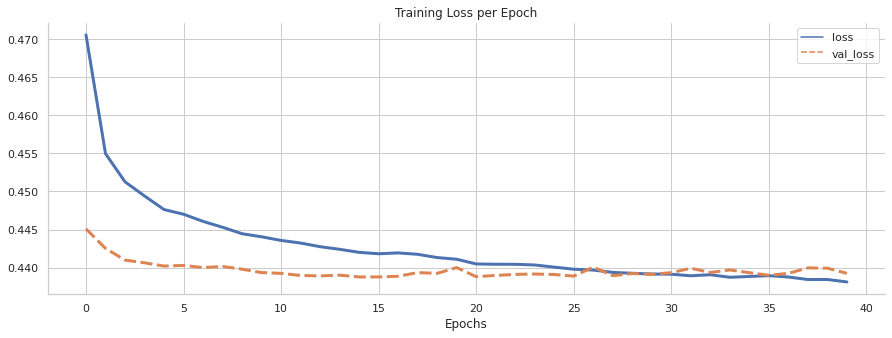

In [57]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [58]:
y_pred = model.predict(X_test)

y_pred = y_pred.round()
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.05      0.09      8406
           1       0.82      0.99      0.90     37000

    accuracy                           0.82     45406
   macro avg       0.68      0.52      0.49     45406
weighted avg       0.77      0.82      0.75     45406



Confusion Matrix:
[[  388  8018]
 [  321 36679]]


In [59]:
rnd.seed(101)
random_ind = rnd.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

id                  1176649.00
loan_amnt             16000.00
term                     36.00
int_rate                  6.03
installment             486.97
                       ...    
purpose_vacation          0.00
purpose_wedding           0.00
OTHER                     0.00
OWN                       0.00
RENT                      0.00
Name: 224202, Length: 65, dtype: float64

In [60]:
# Reshape data
model.predict(new_customer.values.reshape(1,65))

array([[1.]], dtype=float32)

In [61]:
# Prediction
df.iloc[random_ind]['loan_repaid']

1.0

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227028 entries, 0 to 466283
Data columns (total 66 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   227028 non-null  int64  
 1   loan_amnt                            227028 non-null  int64  
 2   term                                 227028 non-null  int64  
 3   int_rate                             227028 non-null  float64
 4   installment                          227028 non-null  float64
 5   annual_inc                           227028 non-null  float64
 6   dti                                  227028 non-null  float64
 7   open_acc                             227028 non-null  float64
 8   pub_rec                              227028 non-null  float64
 9   revol_bal                            227028 non-null  int64  
 10  revol_util                           227028 non-null  float64
 11  total_acc    